# Introduction to Sampling

Learn what sampling is and why it is so powerful. You’ll also learn about the problems caused by convenience sampling and the differences between true randomness and pseudo-randomness.

# 1. Sampling and point estimates

<b>1.1 Reasons for sampling</b>

Sampling is an important technique in your statistical arsenal. It isn't always appropriate though—you need to know when to use it and when to work with the whole dataset.

Which of the following is not a good scenario to use sampling?

Possible Answers:
- You've been handed one terabyte of data about error logs for your company's device. (True)

- You wish to learn about the travel habits of all Pakistani adult citizens.

- You've finished collecting data on a small study of the wing measurements for 10 butterflies.

- You are working to predict customer turnover on a big data project for your marketing firm.

Ten butterflies is a small dataset, so sampling isn't useful here.

<b>1.2 Simple sampling with pandas</b>

Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.

Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
spotify_population = pd.read_feather("C:\\Users\\yazan\\Desktop\\Data_Analytics\\8-Sampling in Python\Datasets\\spotify_2000_2020.feather")

In [70]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample)

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                                   artists  danceability  \
34766      0.002000                               ['STARSET']         0.328   
18346      0.170000                          ['Night Lovell']         0.801   
25989      0.000973                             ['The Heavy']         0.647   
15794      0.939000                      ['Imperial Mammoth']         0.685   
28472      0.013700                          ['Colony House']         0.479   
...             ...                                       ...           ...   
23162      0.000517                      ['Bowling For Soup']         0.582   
38651      0.726000  ['Kendrick Lamar', 'BJ The Chicago Kid']         0.383   
6794       0.184000                          ['Shania Twain']         0.739   
11163      0.456000                            ['Crazy Frog']         0.641   
41610      0.474000                            ['Mac Miller']         0.677   

       duration_ms  duration_minutes  energy  expli

<b>1.3 Simple sampling and calculating with NumPy</b>

You can also use numpy to calculate parameters or statistics from a list or pandas Series.

You'll be turning it up to eleven and looking at the loudness property of each song.

In [71]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.595480000000001


# 2. Convenience sampling

<b>2.1 Are findings from the sample generalizable?</b>

Sampling—collecting data using the easiest method like(finding the average population age in France by asking a sample of people visiting Disneyland) can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.

The Spotify dataset contains an acousticness column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the acousticness distribution of the total population of songs with a sample of those songs.

Plot a histogram of the acousticness from spotify_population with bins of width 0.01 from 0 to 1 using pandas .hist().

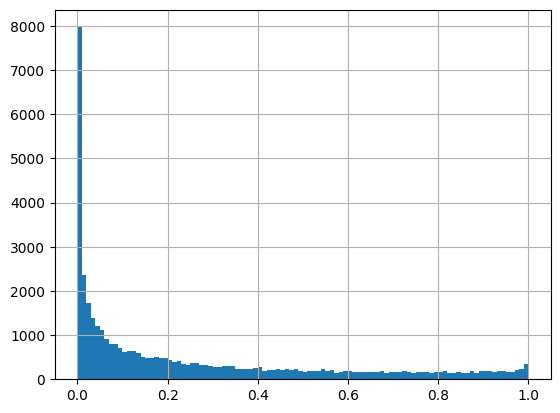

In [72]:
# Visualize the distribution of acousticness with a histogram
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

Update the histogram code to use the spotify_mysterious_sample dataset.

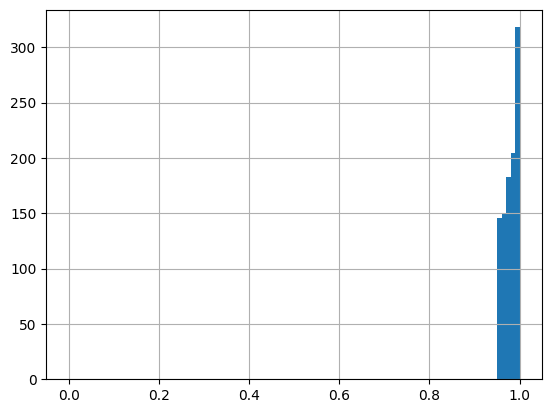

In [73]:
spotify_mysterious_sample = spotify_population[spotify_population['acousticness']>=0.951].sample(n=1000)

# Update the histogram to use spotify_mysterious_sample
spotify_mysterious_sample['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show()

<b>Question</b>

Compare the two histograms you drew. Are the acousticness values in the sample generalizable to the general population?

Possible Answers

- Yes. Any sample should lead to a generalizable result about the population.

- Yes. The sample selected is likely a random sample of all songs in our population.

- No. Samples can never lead to generalizable results about the population.

- No. The acousticness samples are consistently higher than those in the general population. (True)

- No. The acousticness samples are consistently lower than those in the general population.

The acousticness values in the sample are all greater than 0.95, whereas they range from 0 to 1 in the whole population.

<b>2.2 Are these findings generalizable?</b>

Let's look at another sample to see if it is representative of the population. This time, you'll look at the duration_minutes column of the Spotify dataset, which contains the length of the song in minutes.

Plot a histogram of duration_minutes from spotify_population with bins of width 0.5 from 0 to 15 using pandas .hist().

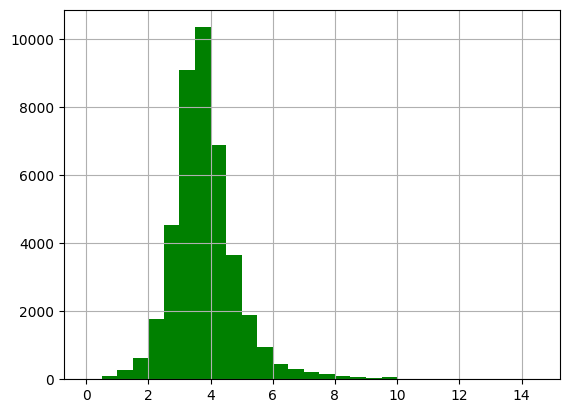

In [80]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15, 0.5), color = 'green')
plt.show()